In [270]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [272]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [273]:
path="/content/drive/My Drive/Colab Notebooks/ParisHousingClass.csv"

In [274]:
df=pd.read_csv(path)
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [275]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [276]:
df.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4,Basic


In [277]:
df.shape

(10000, 18)

In [278]:
df.size

180000

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [280]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [281]:
df1=pd.DataFrame(df)
df1

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [282]:
df1.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [283]:
df1.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4,Basic


In [284]:
df1.shape

(10000, 18)

In [285]:
df1.size

180000

In [286]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [287]:
df1.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [288]:
df1['hasYard'].value_counts()
df1['hasYard']=df1['hasYard'].astype('category')
d=df1['hasYard'].dtype
d

CategoricalDtype(categories=[0, 1], ordered=False)

In [289]:
df1['hasPool'].value_counts()
df1['hasPool']=df1['hasPool'].astype('category')
d1=df1['hasPool'].dtype
d1

CategoricalDtype(categories=[0, 1], ordered=False)

In [290]:
df1['hasStorageRoom'].value_counts()
df1['hasStorageRoom']=df1['hasStorageRoom'].astype('category')
d2=df1['hasStorageRoom'].dtype
d2

CategoricalDtype(categories=[0, 1], ordered=False)

In [291]:
df1['hasGuestRoom'].value_counts()
df1['hasGuestRoom']=df1['hasGuestRoom'].astype('category')
d3=df1['hasGuestRoom'].dtype
d3

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=False)

In [292]:
df1['isNewBuilt'].value_counts()
df1['isNewBuilt']=df1['isNewBuilt'].astype('category')
d4=df1['isNewBuilt'].dtype
d4

CategoricalDtype(categories=[0, 1], ordered=False)

In [293]:
df1['hasStormProtector']
df1['hasStormProtector']=df1['hasStormProtector'].astype('category')
d5=df1['hasStormProtector'].dtype
d5

CategoricalDtype(categories=[0, 1], ordered=False)

In [294]:
df1['cityPartRange'].value_counts()
df1['cityPartRange']=df1['cityPartRange'].replace({1: 1, 2: 2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:10})
df1['cityPartRange']=df1['cityPartRange'].astype('category')
df1['cityPartRange'].dtype


CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=False)

In [295]:
df1['category'].value_counts()
df1['category']=df1['category'].replace({'Luxury': 0, 'Basic': 1})
df1['category']=df1['category'].astype('category')
df1['category'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [296]:
df1.describe()

,squareMeters,numberOfRooms,floors,cityCode,numPrevOwners,made,basement,attic,garage,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.856667,9.30809,2876.729545,2894.33221,262.05017,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,1.000677e+07


In [297]:
df1.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [298]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   squareMeters       10000 non-null  int64   
 1   numberOfRooms      10000 non-null  int64   
 2   hasYard            10000 non-null  category
 3   hasPool            10000 non-null  category
 4   floors             10000 non-null  int64   
 5   cityCode           10000 non-null  int64   
 6   cityPartRange      10000 non-null  category
 7   numPrevOwners      10000 non-null  int64   
 8   made               10000 non-null  int64   
 9   isNewBuilt         10000 non-null  category
 10  hasStormProtector  10000 non-null  category
 11  basement           10000 non-null  int64   
 12  attic              10000 non-null  int64   
 13  garage             10000 non-null  int64   
 14  hasStorageRoom     10000 non-null  category
 15  hasGuestRoom       10000 non-null  category
 16  price

Text(0.5, 1.0, 'Boxplot of Price')

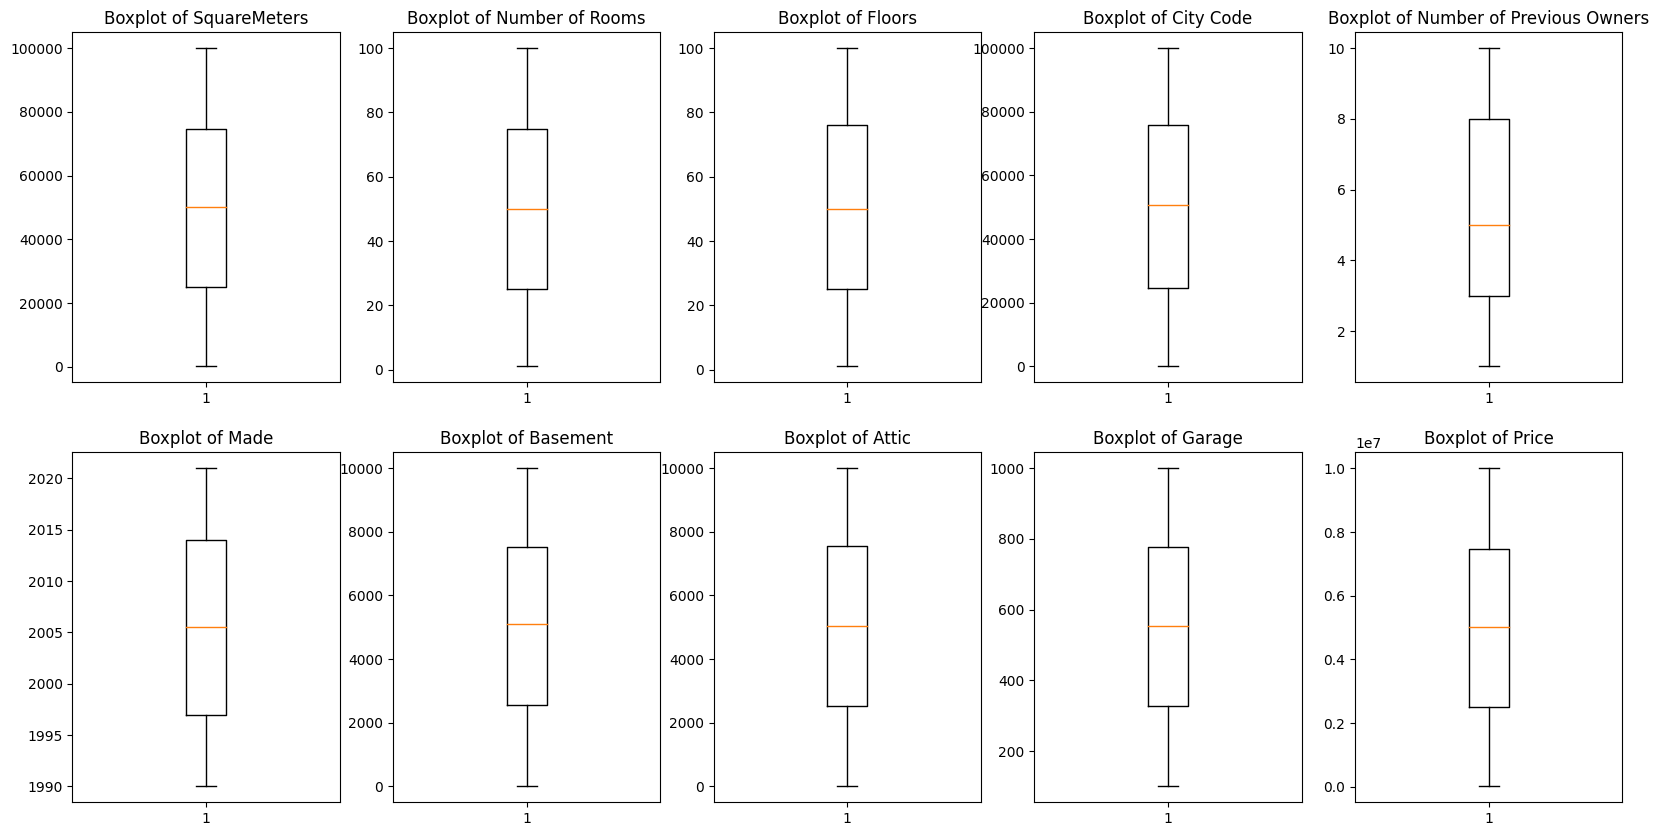

In [299]:
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
plt.boxplot(df1['squareMeters'])
plt.title('Boxplot of SquareMeters')

plt.subplot(2,5,2)
plt.boxplot(df1['numberOfRooms'])
plt.title('Boxplot of Number of Rooms')


plt.subplot(2,5,3)
plt.boxplot(df1['floors'])
plt.title('Boxplot of Floors')

plt.subplot(2,5,4)
plt.boxplot(df1['cityCode'])
plt.title('Boxplot of City Code')


plt.subplot(2,5,5)
plt.boxplot(df1['numPrevOwners'])
plt.title('Boxplot of Number of Previous Owners')

plt.subplot(2,5,6)
plt.boxplot(df1['made'])
plt.title('Boxplot of Made')

plt.subplot(2,5,7)
plt.boxplot(df1['basement'])
plt.title('Boxplot of Basement')

plt.subplot(2,5,8)
plt.boxplot(df1['attic'])
plt.title('Boxplot of Attic')

plt.subplot(2,5,9)
plt.boxplot(df1['garage'])
plt.title('Boxplot of Garage')

plt.subplot(2,5,10)
plt.boxplot(df1['price'])
plt.title('Boxplot of Price')






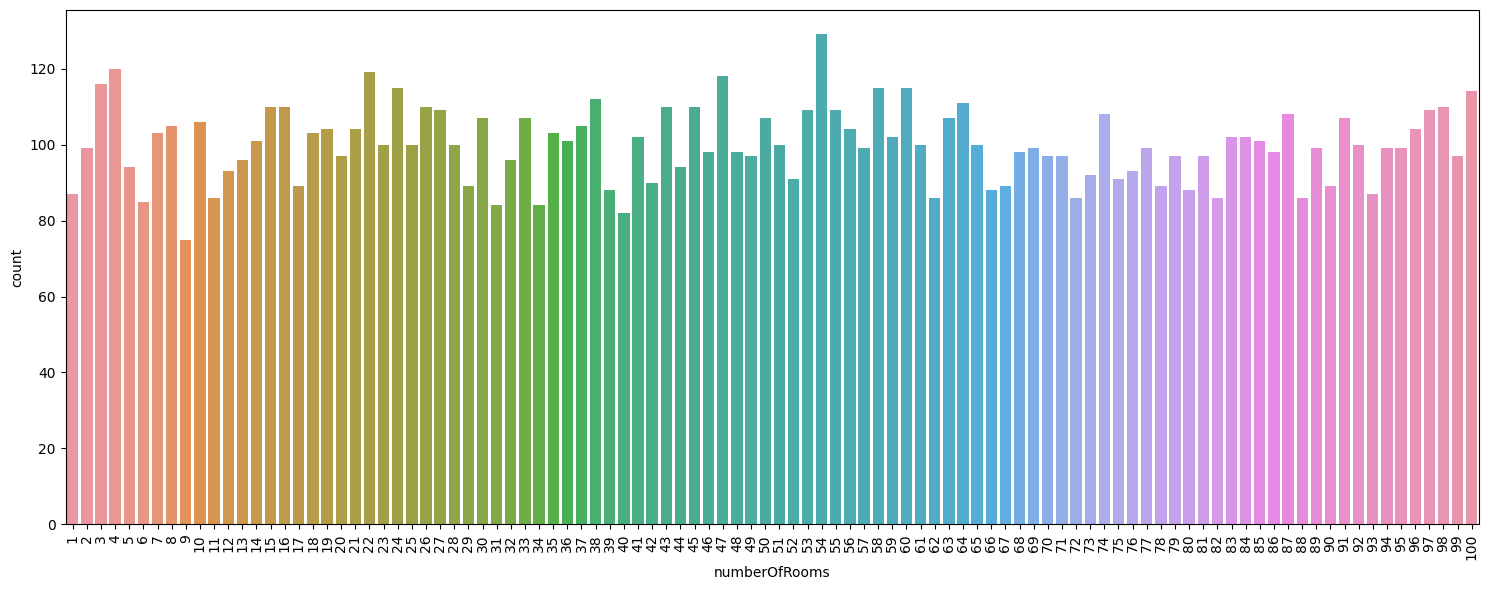

In [300]:
plt.figure(figsize=(15,6))
sns.countplot(x=df1.numberOfRooms)
plt.xticks(rotation=90)
plt.tight_layout()

<Axes: xlabel='hasYard', ylabel='count'>

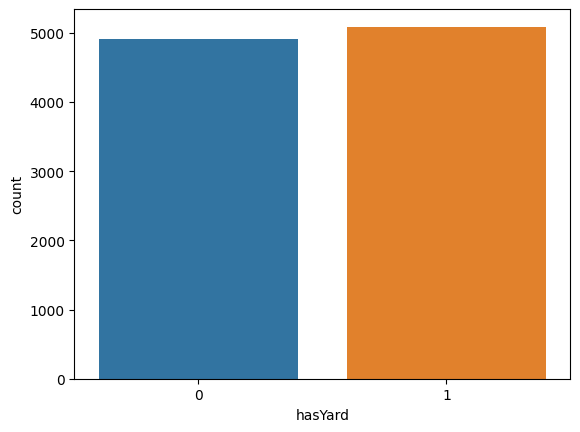

In [301]:
sns.countplot(x=df1.hasYard)

<Axes: xlabel='cityPartRange', ylabel='count'>

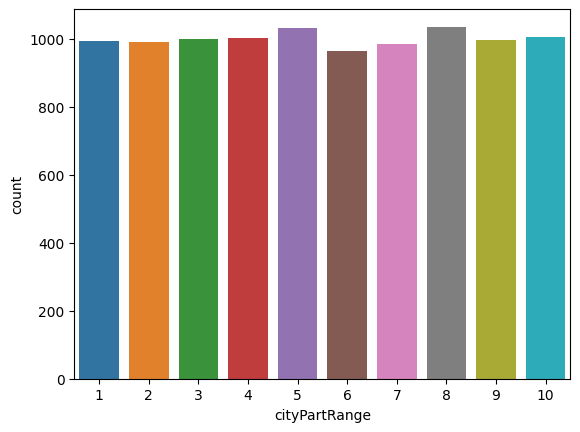

In [302]:
sns.countplot(x=df1.cityPartRange)

<Axes: xlabel='hasPool', ylabel='count'>

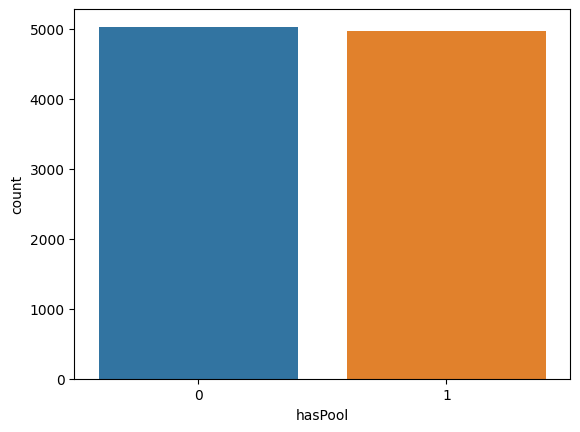

In [303]:
sns.countplot(x=df1.hasPool)

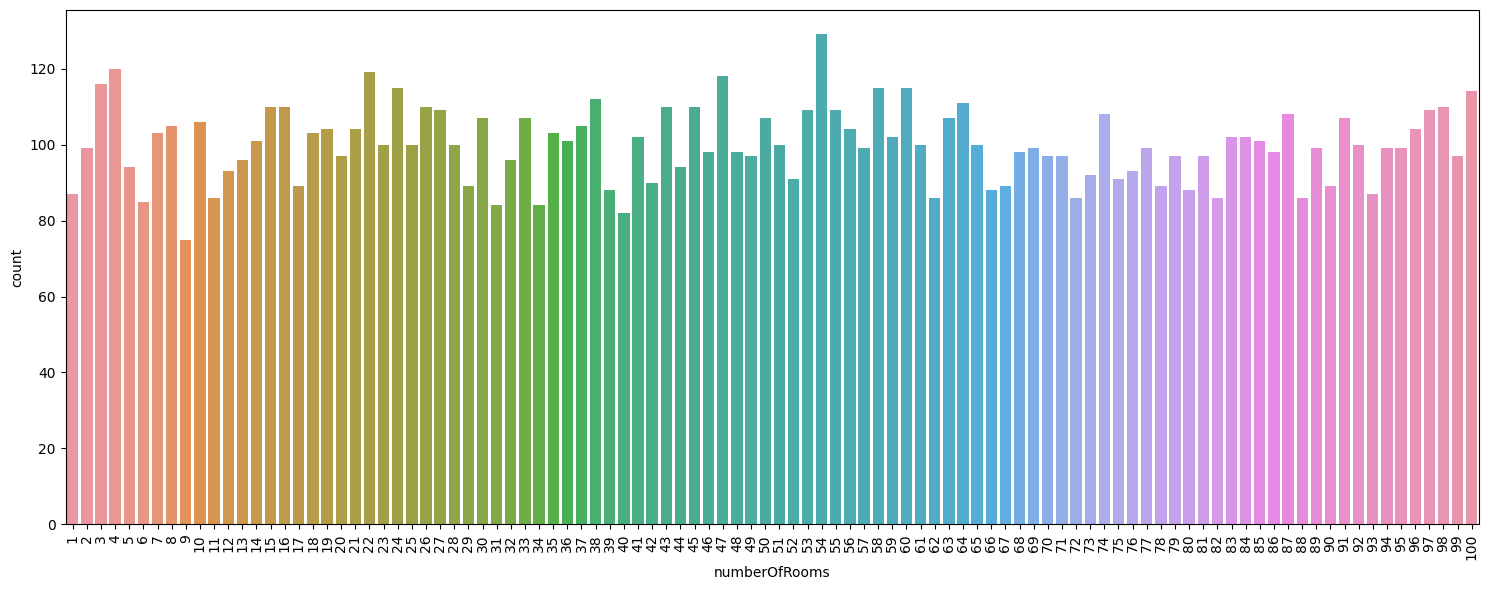

In [304]:
plt.figure(figsize=(15,6))
sns.countplot(x=df1.numberOfRooms)
plt.xticks(rotation=90)
plt.tight_layout()

<Axes: xlabel='numPrevOwners', ylabel='count'>

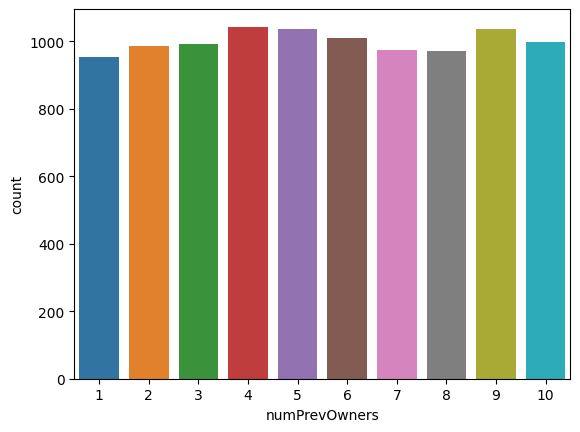

In [305]:
df1['numPrevOwners'].value_counts()
sns.countplot(x=df1.numPrevOwners)

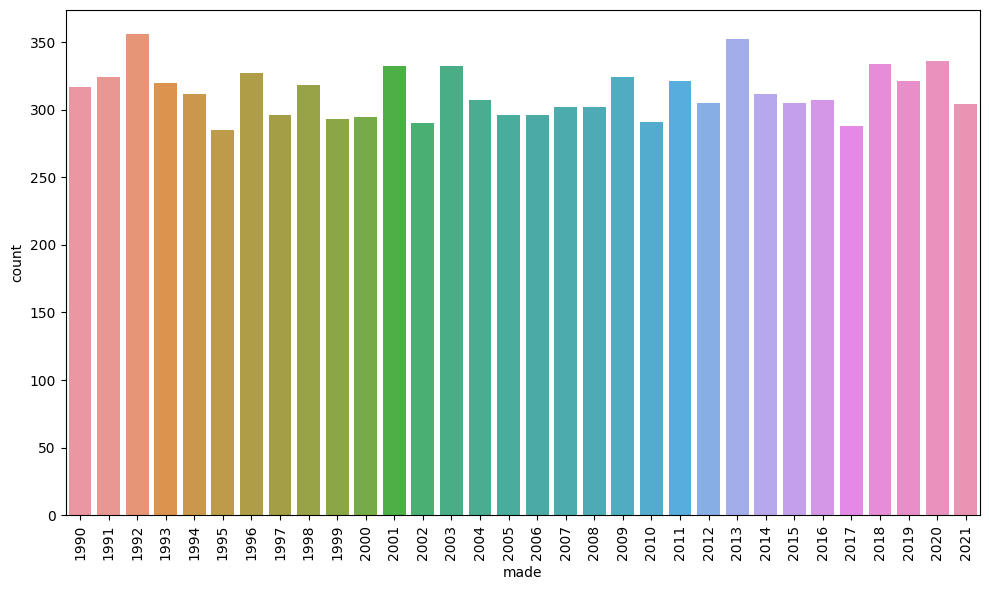

In [306]:
df1['made'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(x=df1.made)
plt.xticks(rotation=90)
plt.tight_layout()

<Axes: xlabel='isNewBuilt', ylabel='count'>

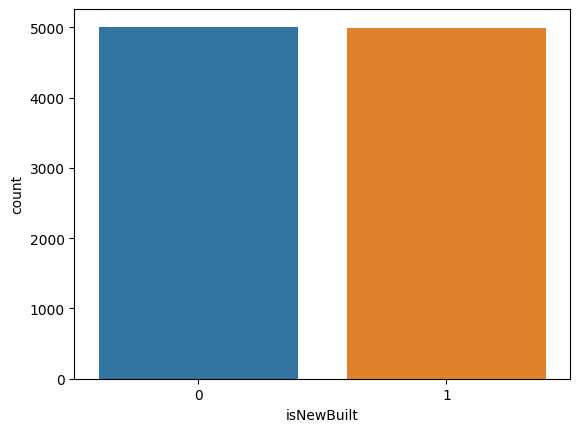

In [307]:
sns.countplot(x=df1.isNewBuilt)

<Axes: xlabel='hasStormProtector', ylabel='count'>

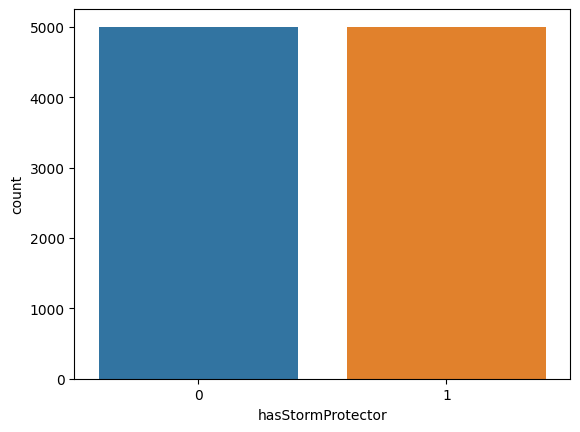

In [308]:
sns.countplot(x=df1.hasStormProtector)

<Axes: xlabel='category', ylabel='count'>

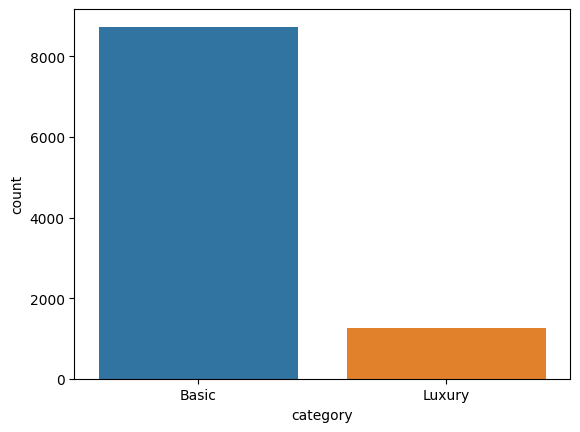

In [309]:
sns.countplot(x=df.category)

(array([1007.,  956.,  954.,  991., 1004., 1058., 1029.,  999.,  999.,
        1003.]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <BarContainer object of 10 artists>)

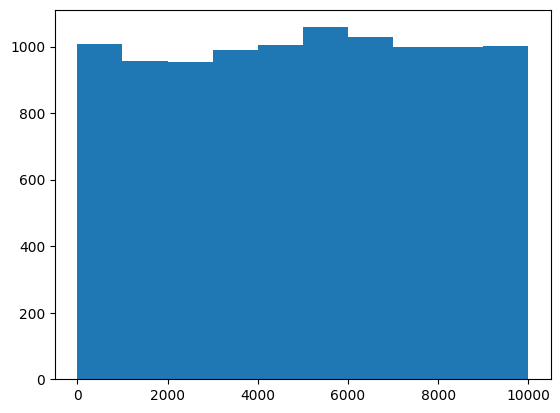

In [310]:
#sns.countplot(x=df1.basement)
plt.hist(df1['basement'],histtype='bar')

(array([ 989., 1038.,  921.,  989., 1014.,  985., 1024., 1021., 1005.,
        1014.]),
 array([1.0000e+00, 1.0009e+03, 2.0008e+03, 3.0007e+03, 4.0006e+03,
        5.0005e+03, 6.0004e+03, 7.0003e+03, 8.0002e+03, 9.0001e+03,
        1.0000e+04]),
 <BarContainer object of 10 artists>)

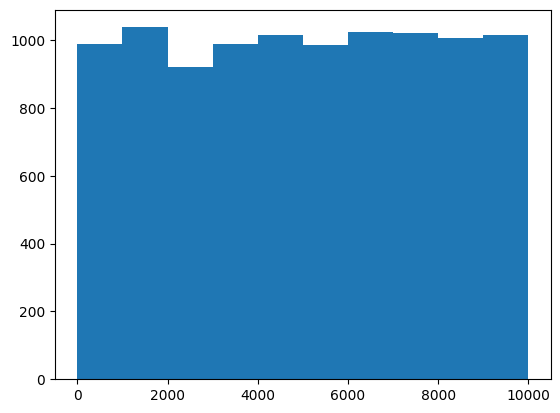

In [311]:
plt.hist(df1['attic'],histtype='bar')

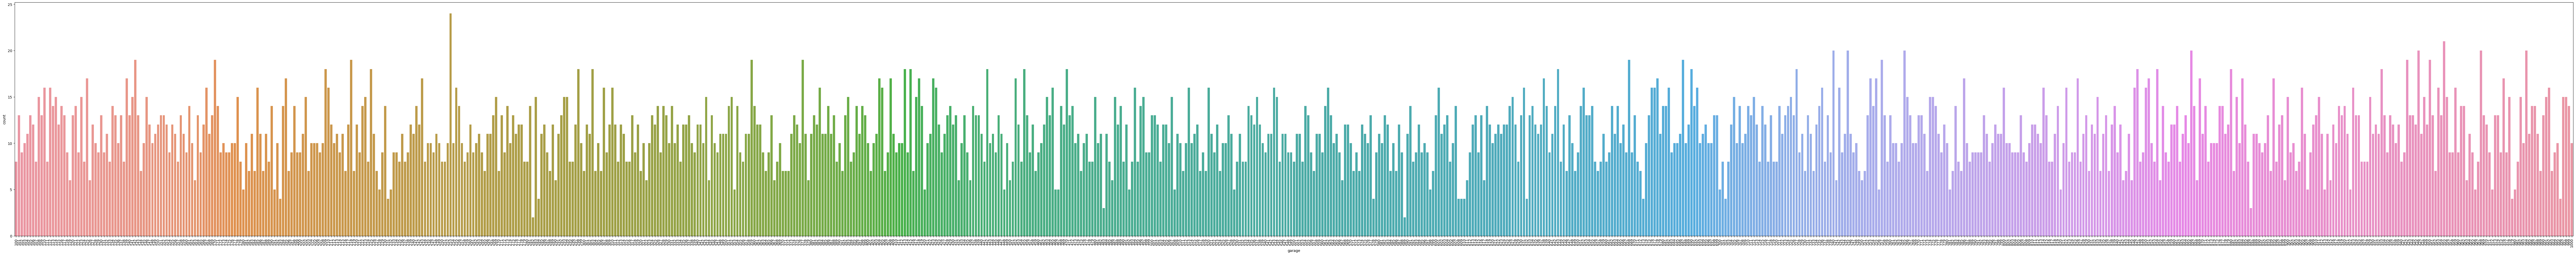

In [312]:
df1['garage'].value_counts()
plt.figure(figsize=(100,10))
sns.countplot(x=df1.garage)
plt.xticks(rotation=90)
plt.tight_layout()

<Axes: xlabel='hasStorageRoom', ylabel='count'>

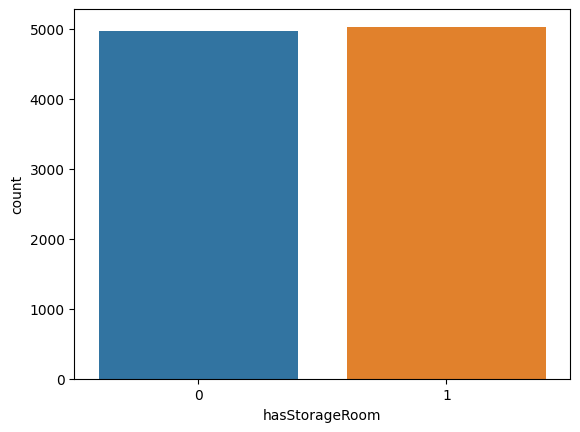

In [313]:
sns.countplot(x=df1.hasStorageRoom)

<Axes: xlabel='hasGuestRoom', ylabel='count'>

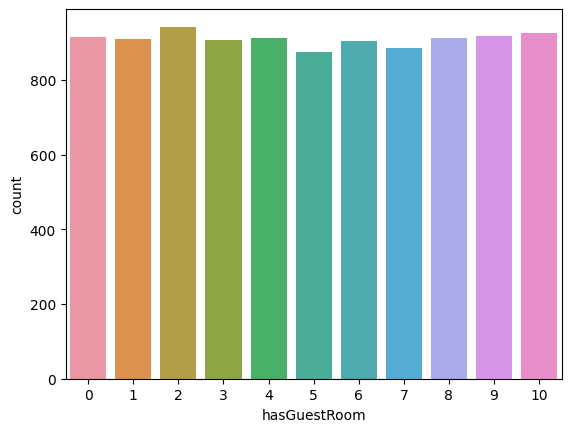

In [314]:
sns.countplot(x=df1.hasGuestRoom)

In [315]:
df1.skew()

<ipython-input-315-da7f0cf1c7b0>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.skew()


squareMeters    -0.006418
numberOfRooms    0.018737
floors           0.014931
cityCode        -0.022287
numPrevOwners    0.002245
made            -0.005157
basement        -0.027215
attic           -0.016826
garage          -0.018874
price           -0.006449
dtype: float64

In [316]:
df1.kurt()

<ipython-input-316-dce92c24f3c8>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.kurt()


squareMeters    -1.185054
numberOfRooms   -1.183219
floors          -1.201161
cityCode        -1.221407
numPrevOwners   -1.212246
made            -1.219774
basement        -1.182231
attic           -1.205121
garage          -1.210573
price           -1.185034
dtype: float64

In [317]:
d6=df1.corr()
d6

<ipython-input-317-548420e46a4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d6=df1.corr()


,squareMeters,numberOfRooms,floors,cityCode,numPrevOwners,made,basement,attic,garage,price
squareMeters,1.000000,0.009573,0.001109,-0.001541,0.016619,-0.007207,-0.003960,-0.000588,-0.017246,0.999999
numberOfRooms,0.009573,1.000000,0.022244,0.009040,0.016766,0.003978,-0.013990,0.012061,0.023188,0.009591
floors,0.001109,0.022244,1.000000,0.002207,0.002463,0.005022,0.006228,-0.000270,0.011303,0.001654
cityCode,-0.001541,0.009040,0.002207,1.000000,-0.007549,0.009266,0.002652,-0.002019,-0.002208,-0.001539
numPrevOwners,0.016619,0.016766,0.002463,-0.007549,1.000000,0.006858,-0.000862,0.000719,0.020268,0.016619
made,-0.007207,0.003978,0.005022,0.009266,0.006858,1.000000,-0.005506,0.013773,0.005687,-0.007210
basement,-0.003960,-0.013990,0.006228,0.002652,-0.000862,-0.005506,1.000000,-0.003180,0.000117,-0.003967
attic,-0.000588,0.012061,-0.000270,-0.002019,0.000719,0.013773,-0.003180,1.000000,-0.000611,-0.000600
garage,-0.017246,0.023188,0.011303,-0.002208,0.020268,0.005687,0.000117,-0.000611,1.000000,-0.017229
price,0.999999,0.009591,0.001654,-0.001539,0.016619,-0.007210,-0.003967,-0.000600,-0.017229,1.000000


<ipython-input-318-93d77a211535>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True,fmt=".2f",cmap='coolwarm',)


<Axes: >

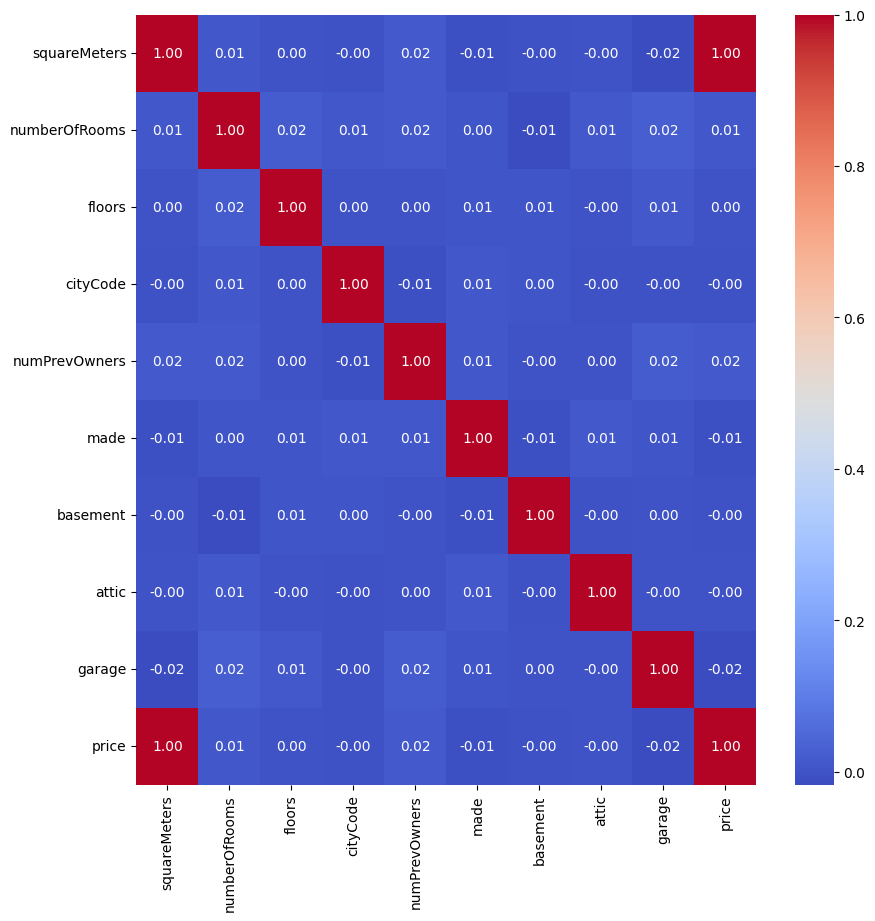

In [318]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,fmt=".2f",cmap='coolwarm',)

In [319]:

y = df1['price']
y

# Define the features (all other columns except 'price')
X = df1.drop(columns=['price'])
X
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 17)
(2000, 17)
(8000,)
(2000,)


In [320]:
train_class_distribution = y_train.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)

In [321]:

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [322]:
y_pred = model.predict(X_test)

In [323]:
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
rmsle=np.log(rmse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error:{rmse}")
print(f"Root Mean Squared Log Error:{rmsle}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error:1510.000626697313
Mean Squared Error: 3695983.458085205
Root Mean Squared Error:1922.494072314712
Root Mean Squared Log Error:7.561378618053699
R-squared (R2) Score: 0.9999995780241576


<Axes: xlabel='price'>

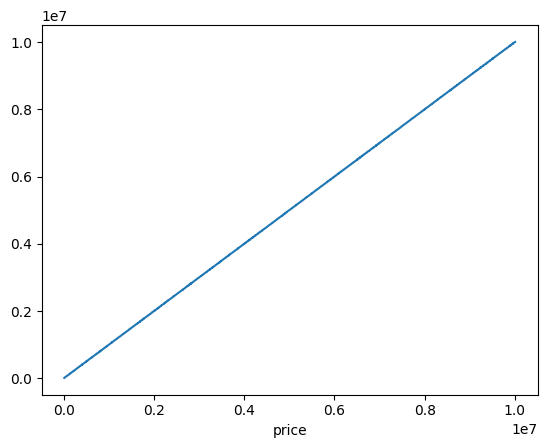

In [324]:
sns.lineplot(x=y_test,y=y_pred)

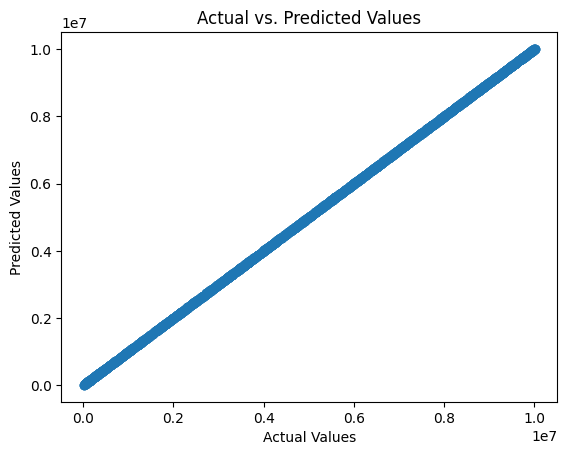

In [325]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [326]:
y_pred_train=model.predict(X_train)

In [327]:
mae=mean_absolute_error(y_train,y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse=np.sqrt(mse)
rmsle=np.log(rmse)
r2 = r2_score(y_train, y_pred_train)
print(f"Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error:{rmse}")
print(f"Root Mean Squared Log Error:{rmsle}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error:1470.7676641911207
Mean Squared Error: 3575290.0994709968
Root Mean Squared Error:1890.8437533204578
Root Mean Squared Log Error:7.544778438761601
R-squared (R2) Score: 0.9999995615523728


In [336]:


y1 = df1['category']
y1

# Define the features (all other columns except 'price')
X1 = df1.drop(columns=['category'])
X1
# Split the data into train and test sets (80% train, 20% test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(8000, 17)
(2000, 17)
(8000,)
(2000,)


In [337]:
y_train1.value_counts()

1    6991
0    1009
Name: category, dtype: int64

In [338]:
y_test1.value_counts()

1    1744
0     256
Name: category, dtype: int64

In [339]:
model1= LogisticRegression()

# Fit the model to the training data
model1.fit(X_train1, y_train1)

LogisticRegression()

In [340]:
y_pred2=model1.predict(X_test1)

In [341]:
accuracy = accuracy_score(y_test1, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test1, y_pred2)
print('Confusion Matrix:\n', cm)

# Classification report
report = classification_report(y_test1, y_pred2)
print('Classification Report:\n', report)

Accuracy: 0.87
Confusion Matrix:
 [[   0  256]
 [   0 1744]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       256
           1       0.87      1.00      0.93      1744

    accuracy                           0.87      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.76      0.87      0.81      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [342]:
y_pred1_train=model1.predict(X_train1)

In [343]:
accuracy = accuracy_score(y_train1, y_pred1_train)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_train1, y_pred1_train)
print('Confusion Matrix:\n', cm)

# Classification report
report = classification_report(y_train1, y_pred1_train)
print('Classification Report:\n', report)

Accuracy: 0.87
Confusion Matrix:
 [[   0 1009]
 [   0 6991]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1009
           1       0.87      1.00      0.93      6991

    accuracy                           0.87      8000
   macro avg       0.44      0.50      0.47      8000
weighted avg       0.76      0.87      0.82      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
